In [1]:
%%javascript
(function(on) {
const e=$( "<a>Setup failed</a>" );
const ns="js_jupyter_suppress_warnings";
var cssrules=$("#"+ns);
if(!cssrules.length) cssrules = $("<style id='"+ns+"' type='text/css'>div.output_stderr { } </style>").appendTo("head");
e.click(function() {
    var s='Showing';  
    cssrules.empty()
    if(on) {
        s='Hiding';
        cssrules.append("div.output_stderr, div[data-mime-type*='.stderr'] { display:none; }");
    }
    e.text(s+' warnings (click to toggle)');
    on=!on;
}).click();
$(element).append(e);
})(true);

<IPython.core.display.Javascript object>

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
import ar2gas as gas
import pygeostat as gs
import numpy as np
import matplotlib.pyplot as plt
import helpers
from scipy.stats import norm
import proportions
import variogram_on_grid
import pandas as pd

In [4]:
data = gs.DataFile(flname='dataset.csv', x='x', y='y')
data['zeros'] = 0
gs.write_gslib(data, 'sgsim_lva/data_zeros.dat')

C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat

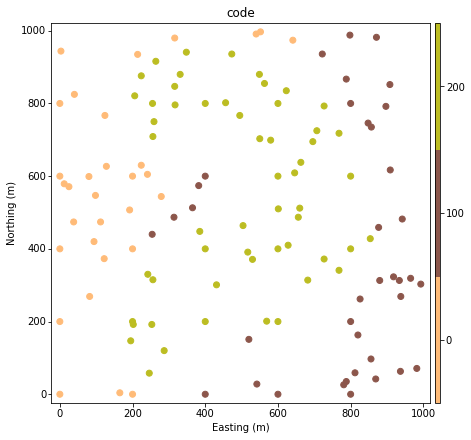

In [5]:
gs.locmap(data, x='x', y='y', figsize=(7,7))

C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat

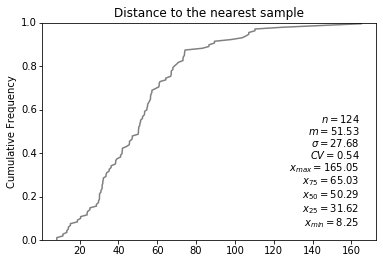

In [6]:
helpers.samples_dist(data.data.x, data.data.y, None)

C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat

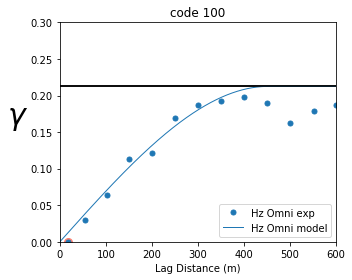

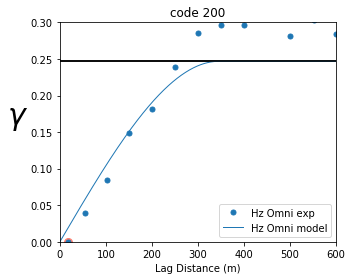

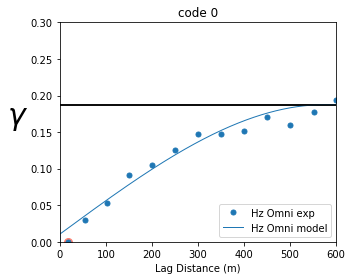

In [7]:
codes = data.data.code.unique()
#fig, axes = plt.subplots(1, 3, figsize=(15,5))
variograms = {}
for idx, c in enumerate(codes):
    data['ind_{}'.format(c)] = np.where((data['code'] == c) == True, 1, 0)
    vario = gs.Variogram(data, 'ind_{}'.format(c), ndim=2, ndir=1, omnihz=True, mute=True, warn=False)
    vario.settols(nlags=12, lagdist=50, lagtol=25)
    vario.varcalc()
    vario.fitmodel(sill=np.var(data['ind_{}'.format(c)]))
    #ax = vario.plot(titles='code {}'.format(int(c)), model=True, sill=np.var(data['ind_{}'.format(c)]), ylim=[0.0,0.3], axes=axes[idx], ms=5)
    fig = vario.plot(titles='code {}'.format(int(c)), model=True, sill=np.var(data['ind_{}'.format(c)]), ylim=[0.0,0.3], ms=5, figsize=(5,4))
    variograms['code {}'.format(int(c))] = helpers.gslibvar_to_ar2gasvar(vario.model)
    plt.tight_layout()

In [8]:
a2ggrid, gsgrid = helpers.autogrid(data.data.x, data.data.y, None, 1, 1, 1)

In [9]:
ind_krig = {}
#fig, axes = gs.subplots(1, 3, figsize=(20,5), cbar_mode='single')
ps = gas.data.PointSet(data.data.x.values, data.data.y.values, np.zeros(len(data.data.y.values)))
for idx, c in enumerate(codes):
    krig_cov = gas.compute.KrigingCovariance(1.,variograms['code {}'.format(int(c))])
    kriger = gas.compute.DualKriging.OK(krig_cov, ps, data.data['ind_{}'.format(c)], 0)
    results = np.ones(a2ggrid.size())*float('nan')
    kriger.compute(a2ggrid, results, 0)
    ind_krig['code {}'.format(int(c))] = results
    #gs.pixelplt(results, gsgrid, ax = axes[idx], title='code {}'.format(int(c)))

C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat

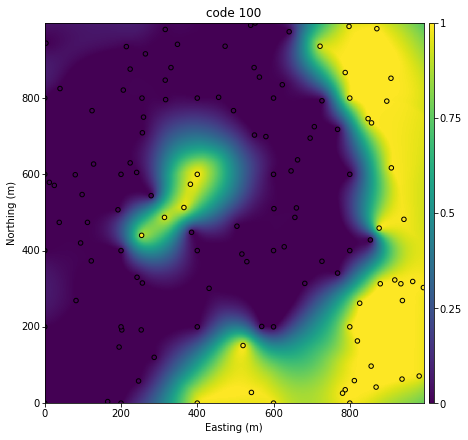

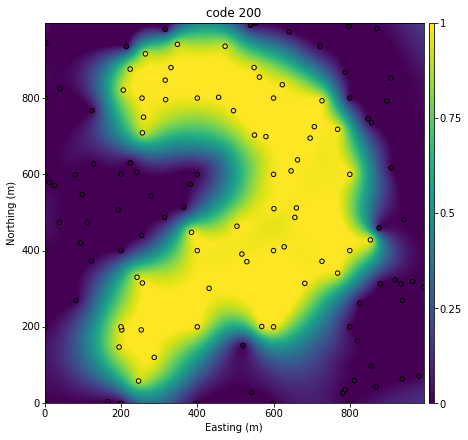

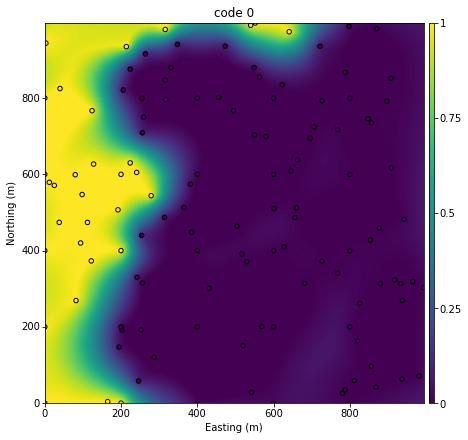

In [10]:
std_results = helpers.standardize([ind_krig['code 100'], ind_krig['code 200'], ind_krig['code 0']])
for idx, c in enumerate(codes):
    gs.pixelplt(std_results[idx], gsgrid, title='code {}'.format(int(c)), figsize = (7,7), pointdata=data, pointvar='ind_{}'.format(c), pointkws={'marker':'o', 's':20, 'edgecolors': 'k'})

C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat

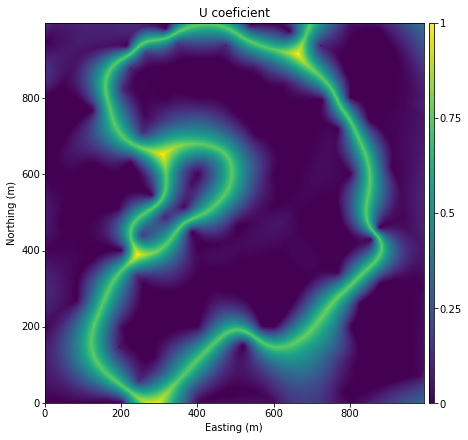

In [11]:
u = helpers.u_coef(std_results)
u_pp = gs.pixelplt(u, gsgrid, title='U coeficient', figsize = (7,7))

In [12]:
u_df = pd.DataFrame()
u_df['U'] = u
u_df.to_csv('imorient/u.csv', index=False)
u_datafile = gs.DataFile('imorient/u.csv')
gs.write_gslib(u_datafile, 'imorient/u.dat')

imorientpar = '''
                   imorient
                   ********

START OF PARAMETERS:
{flname}                      -file with gridded data to get orients from - Note 0
0   -999                      -column for variable to consider, nullval
{griddef}
keyout.out                    -keyout file
1  1                          -column with keyout, value to keep
4   14                        -nlayers, windowsize 
2.  12                        -IDW power and  nearest neighbors for interpolation, - Note 2
1  1                          -export layers for orientations, magnitudes (min=1, max=nlayers)
{outfl}                       -file for output LVA field - Note 0
0                             -Export at different resolution? - Note 3
100  100  100                 -new grid nx, ny, nz, with same span as input 

NOTES:                           
0 -  program accepts GSB input and output, specified by the extension `gsb` or `GSB`
1 -  for best results, ensure grid blocks have roughly equal dimensions (size) in x,y and z directions 
     this can be automated such that the data is processed with equal dimensions and output to the input
     grid resolution. 
2 -  The IDW power and number of neighbors controls interpolation for all parts of the program, 
     between layers and the any final interpolations at the end of the program
3 -  Exporting an LVA field to a different resolution considers the input grid to have the same limits as the 
     given output grid dimensions. A working methodology would be to block-average the model for input to this program, 
     redefine the grid to be coarser but span the same limits, obtain orientations, then interpolate 
     back to the target output resolution for kt3d_lva
'''

imorientpars = {
    'flname':'imorient/u.dat',
    'outfl':'imorient/lva.out',
    'griddef':gsgrid
}

imorient = gs.Program(program= 'imorient/imorient', parfile='imorient/imorient.par')

imorient.run(parstr=imorientpar.format(**imorientpars))

In [13]:
lva_field = gs.DataFile('imorient/lva.out')
#lva_field['dip'] = 0

C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat

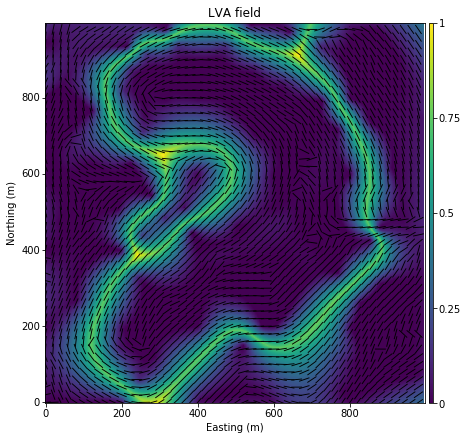

In [14]:
ca2ggrid, cgsgrid = helpers.autogrid(data.data.x, data.data.y, None, 5, 5, 1)
strdip = lva_field[['strike', 'dip']].values
fig, axes = plt.subplots(1, 1, figsize=(7,7))
gs.pixelplt(u, gsgrid, title='LVA field', ax=axes)
gs.lvaplt(strdip, cgsgrid, ax=axes)

In [15]:
real = gs.DataFile('sgsim_lva/output_lva_sgsim.out')
reals = pd.DataFrame()
for i in range(10):
    reals['real {}'.format(i)] = real.data.iloc[(a2ggrid.size() * i) : (a2ggrid.size() * (i + 1))]['Simulated Values'].values

In [16]:
reals.head()

,real 0,real 1,real 2,real 3,real 4,real 5,real 6,real 7,real 8,real 9
0,0.0000,-0.0000,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000,-0.0000,0.0000
1,0.0636,-0.2240,-0.0190,0.2914,-0.0088,0.1167,-0.1138,-0.0577,-0.0284,0.0727
2,0.0811,-0.0921,0.0574,0.2823,-0.0004,0.0897,-0.1856,-0.1730,0.0438,0.0421
3,0.0096,0.0535,0.0214,0.3174,-0.0461,0.0949,-0.1765,-0.2490,0.1539,-0.1477
4,0.1149,-0.1080,0.0240,0.4499,0.0543,0.0076,-0.0922,-0.2024,0.1860,0.0334


In [17]:
results = [reals['real {}'.format(i)].values for i in range(10)]

C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat

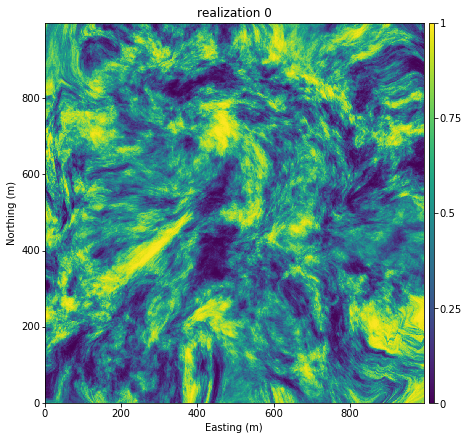

In [18]:
results = [norm.cdf(np.array(lst)) for lst in results]
gs.pixelplt(results[0], gsgrid, title='realization {}'.format(0), figsize = (7,7), pointdata=data, pointkws={'marker':'o', 's':20, 'edgecolors': 'k'})

C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat

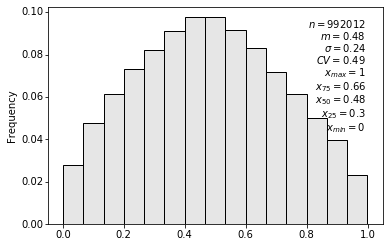

In [19]:
gs.histplt(results[0])

C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat

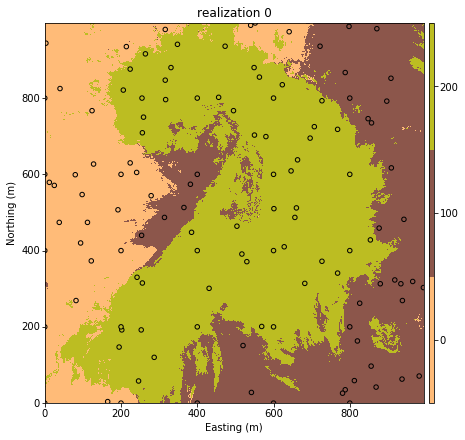

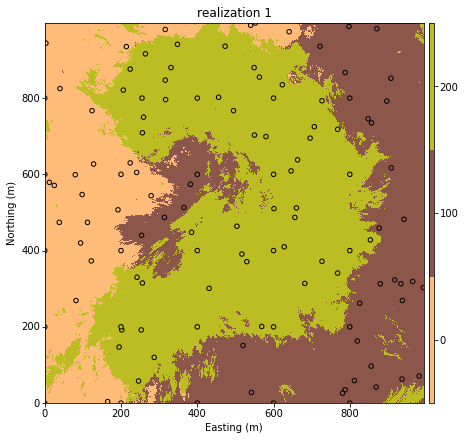

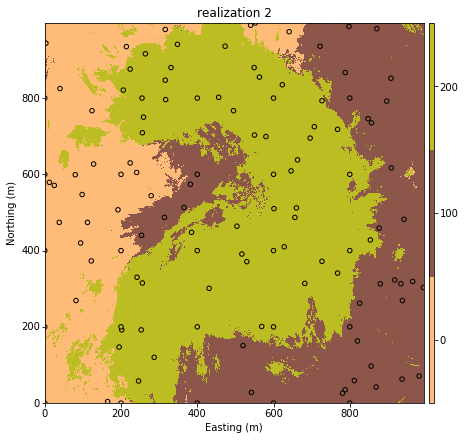

In [20]:
cat_reals = helpers.cat_sampler([ind_krig['code 200'], ind_krig['code 100'], ind_krig['code 0']], [200,100,0], results)
for i in range(0,3):
    gs.pixelplt(np.array(cat_reals[i]), gsgrid, title='realization {}'.format(i), figsize = (7,7), pointdata=data, pointvar='code', pointkws={'marker':'o', 's':20, 'edgecolors': 'k'})

In [21]:
anis = gas.data.AnisotropicTransformation(1000, 1000, 1000, 0, 0, 0)
nei = gas.data.KDTree(ps, 1, anis)
sf = gas.data.SearchFilter.no_filter()
est = gas.compute.NNEstimator.KNN(nei, sf, a2ggrid, data.data.code)
target = est.compute(a2ggrid, 0)

In [22]:
#gs.pixelplt(target, gsgrid, title='NN', figsize = (7,7), pointdata=data, pointvar='code', pointkws={'marker':'o', 's':20, 'edgecolors': 'k'})

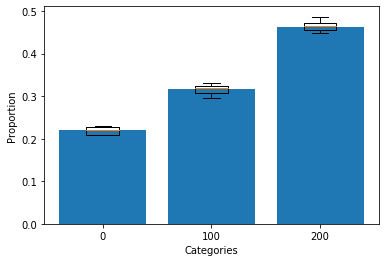

In [23]:
proportions.cat_plot(target, cat_reals, weights=None)

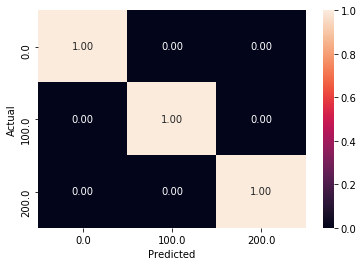

In [24]:
proportions.back_flag(a2ggrid, cat_reals, data.data.x, data.data.y, None, data.data.code)

In [25]:
ind_reals = helpers.reals_to_indicators(cat_reals)

Calculating experimental variograms for step 10
Calculating experimental variograms for step 20
Calculating experimental variograms for step 30
Calculating experimental variograms for step 40
Calculating experimental variograms for step 50
Calculating experimental variograms for step 60
Calculating experimental variograms for step 70
Calculating experimental variograms for step 80
Calculating experimental variograms for step 90
Calculating experimental variograms for step 100


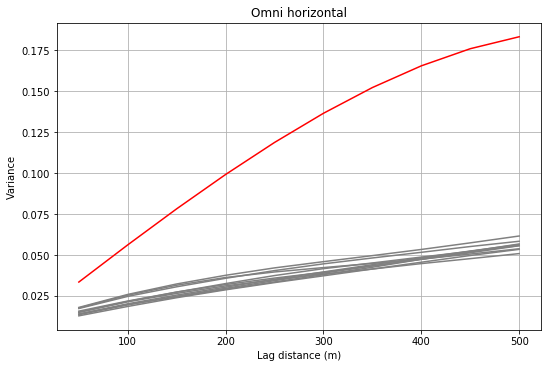

In [26]:
vargrid = variogram_on_grid.Variogram_on_Grid(a2ggrid.dim()[0], a2ggrid.dim()[1], a2ggrid.dim()[2], ind_reals['ind_0'], 10, 10)
vargrid.calculate()
vargrid.plot(5, 1, variograms['code 0'])

In [27]:
vargrid = variogram_on_grid.Variogram_on_Grid(a2ggrid.dim()[0], a2ggrid.dim()[1], a2ggrid.dim()[2], ind_reals['ind_100'], 10, 10)
vargrid.calculate()
vargrid.plot(5, 1, variograms['code 100'])

Calculating experimental variograms for step 10
Calculating experimental variograms for step 20
Calculating experimental variograms for step 30
Calculating experimental variograms for step 40


KeyboardInterrupt: 

In [ ]:
vargrid = variogram_on_grid.Variogram_on_Grid(a2ggrid.dim()[0], a2ggrid.dim()[1], a2ggrid.dim()[2], ind_reals['ind_200'], 10, 10)
vargrid.calculate()
vargrid.plot(5, 1, variograms['code 200'])